**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

**ASTARR**

In [2]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_astarr_gata1 = dat
print(dim(dat))
head(dat)

[1] 6000453       7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786500,47786501,stranded_neg,GATA1,0,0
chrX,47786500,47786501,stranded_pos,GATA1,0,0
chrX,47786500,47786501,unstranded,GATA1,0,0
chrX,47786501,47786502,stranded_neg,GATA1,0,0
chrX,47786501,47786502,stranded_pos,GATA1,0,0
chrX,47786501,47786502,unstranded,GATA1,0,0


**TMPRA**

In [3]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20210130_Ratio.GATA1.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_tmpra_gata1 = dat
print(dim(dat))
head(dat)

[1] 1820026       6


Chrom,Start,End,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786402,2117,10474,4.947567
chrX,47786402,47786403,2117,10474,4.947567
chrX,47786403,47786404,2117,10474,4.947567
chrX,47786404,47786405,2117,10474,4.947567
chrX,47786405,47786406,2117,10474,4.947567
chrX,47786406,47786407,2117,10474,4.947567


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



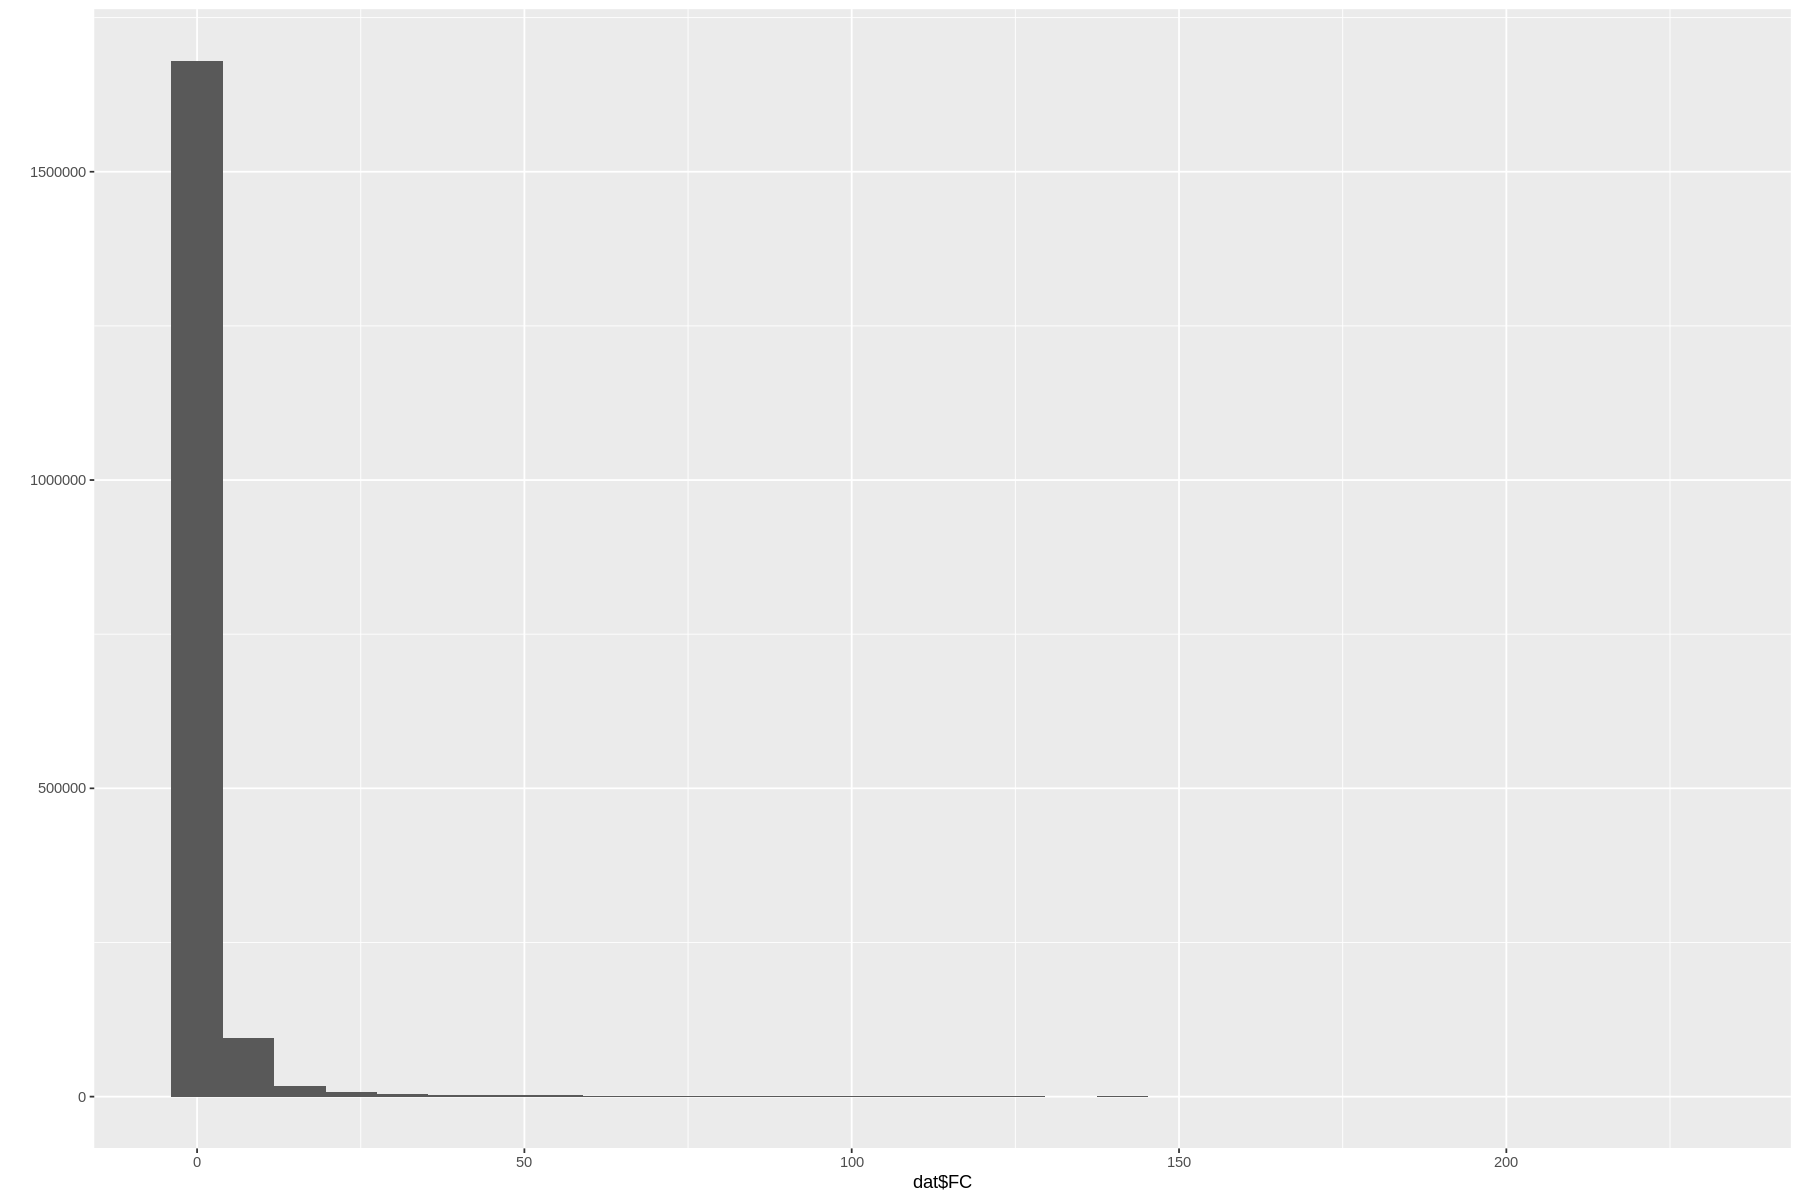

In [5]:
dat = dat_tmpra_gata1
qplot(dat$FC)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


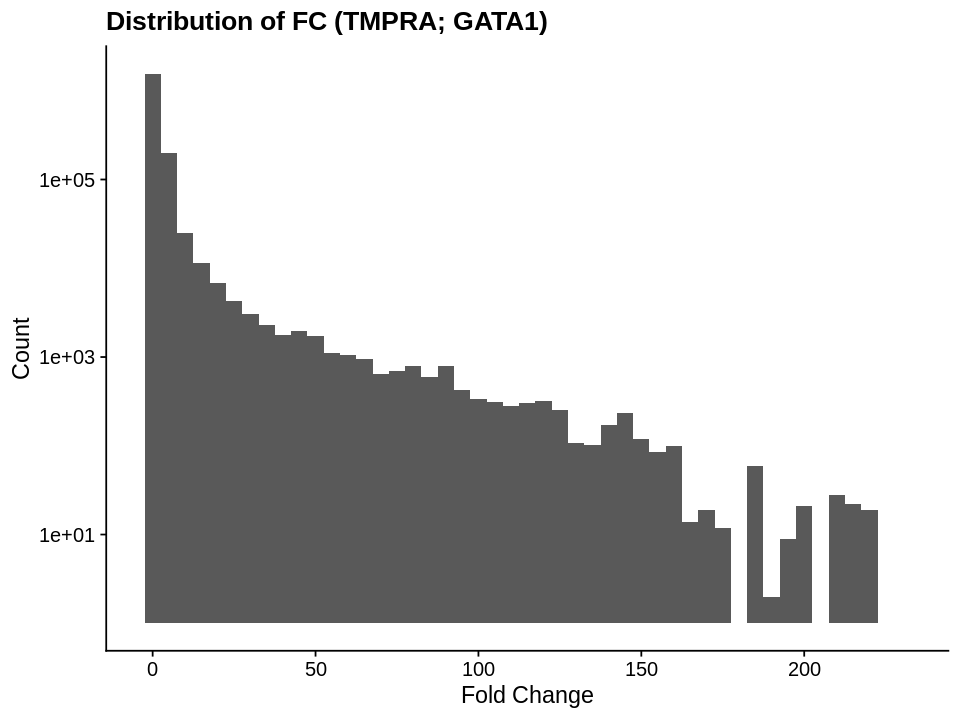

In [12]:
dat = dat_tmpra_gata1
gpt = ggplot(dat, aes(x=FC)) + 
    geom_histogram(binwidth=5) + 
    scale_y_log10() +
    theme_cowplot() +
    labs(x="Fold Change", y="Count", title="Distribution of FC (TMPRA; GATA1)")

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

## Preprocess

In [4]:
dat_cov = dat_astarr_gata1
dat_cov = dat_cov %>% dplyr::filter(Strand == "unstranded")

dat_lfc = dat_cov %>%
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        FC     = Output / Input,
        Log2FC = log2(Output / Input),
        pLog2FC_add01 = log2((Output+ 1)  / (Input+ 1)),
        pLog2FC_add10 = log2((Output+10)  / (Input+10)),
        
        pLog2FC_10neg1 = log2((Output+10^-1)   / (Input+10^-1)),
        pLog2FC_10neg2 = log2((Output+10^-2)   / (Input+10^-2)),
        pLog2FC_10neg3 = log2((Output+10^-3)   / (Input+10^-3)),
        pLog2FC_10neg4 = log2((Output+10^-4)   / (Input+10^-4)),
        pLog2FC_10neg5 = log2((Output+10^-5)   / (Input+10^-5))
    )

dat_cov_astarr = dat_cov
dat_lfc_astarr = dat_lfc
print(dim(dat_cov))
print(dim(dat_lfc))
print(range(c(dat_lfc$Start, dat_lfc$End)))
head(dat_lfc)

[1] 2000151       7
[1] 1636866      16
[1] 47787173 49786588


Chrom,Start,End,Strand,Region,Input,Output,FC,Log2FC,pLog2FC_add01,pLog2FC_add10,pLog2FC_10neg1,pLog2FC_10neg2,pLog2FC_10neg3,pLog2FC_10neg4,pLog2FC_10neg5
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47787173,47787174,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787174,47787175,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787175,47787176,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787176,47787177,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787177,47787178,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787178,47787179,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078


In [5]:
dat_cov = dat_tmpra_gata1
dat_lfc = dat_cov %>%
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        Log2FC = log2(FC),
        pLog2FC_1e2 = log2((Output+  10^+2) / (Input+  10^+2)),
        pLog2FC_5e2 = log2((Output+5*10^+2) / (Input+5*10^+2)),
        pLog2FC_1e3 = log2((Output+  10^+3) / (Input+  10^+3)),
        pLog2FC_1e4 = log2((Output+  10^+4) / (Input+  10^+4)),
        pLog2FC_1e5 = log2((Output+  10^+5) / (Input+  10^+5))
    )

dat_cov_tmpra = dat_cov
dat_lfc_tmpra = dat_lfc
print(dim(dat_cov))
print(dim(dat_lfc))
print(range(c(dat_lfc$Start, dat_lfc$End)))

[1] 1820026       6
[1] 1820023      12
[1] 47786401 49786750


## Import Annotation

In [6]:
### set file path
fdiry = file.path(FD_RES, "source", "cCREs")
fname = "ENCFF971AHO_ENCFF847JMY_ENCFF779QTH_ENCFF405AYC.7group.bed"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Value1", "Value2", "Value3", "Label1", "Label2")
dat_ccre = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat_ccre = dat_ccre %>% 
    dplyr::select(Chrom, Start, End, Name, Label1) %>% 
    dplyr::rename(Label = Label1) %>% 
    distinct

### show table
print(dim(dat_ccre))
head(dat_ccre)

[1] 926535      5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,DNase-only
chr1,190865,191071,EH38E1310154,Low-DNase
chr1,778562,778912,EH38E1310158,"PLS,CTCF-bound"
chr1,779086,779355,EH38E1310159,PLS
chr1,779727,780060,EH38E1310160,Low-DNase
chr1,790397,790626,EH38E1310162,Low-DNase


In [20]:
### set file path
fdiry = file.path(FD_RES, "source", "remap2022")
fname = "remap2022_K-562_nr_macs2_hg38_v1_0.bed.gz"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Value1", "Value2", "Value3")
dat = read_tsv(fpath, col_names=cnames, show_col_types=FALSE)

###
tmp = dat$Name
tmp = str_split(tmp, ":")
tmp = lapply(tmp, function(x){x[1]})
tmp = unlist(tmp)
dat$Label = tmp

### show table
dat_remap = dat
print(dim(dat))
head(dat)

[1] 9936638      10


Chrom,Start,End,Name,Score,Strand,Value1,Value2,Value3,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1,9899,10349,EP400:K-562,1,.,10089,10090,102132184,EP400
chr1,9901,10232,NCOA1:K-562,1,.,10078,10079,56224224,NCOA1
chr1,9902,10328,"ZBTB40:MCF-7,Hep-G2,K-562,GM12878",4,.,10093,10094,7314946,ZBTB40
chr1,9905,10132,AFF1:K-562,1,.,10088,10089,113477,AFF1
chr1,9905,10288,ZNF184:K-562,1,.,10104,10105,157198124,ZNF184
chr1,9907,10242,E2F8:K-562,1,.,10090,10091,124224254,E2F8


In [24]:
###
chrom = "chrX"
start = 48780000
end   = 48826000

In [34]:
dat_ann = dat_remap      %>% dplyr::filter(Chrom == chrom, Start >= start, End <= end, Label == "GATA1")
dat_cov = dat_cov_astarr %>% dplyr::filter(Chrom == chrom, Start >= start, End <= end)
dat_lfc = dat_lfc_astarr %>% dplyr::filter(Chrom == chrom, Start >= start, End <= end)
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_add01))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf, fill = Label),
            alpha=0.5) +
        labs(x="") +
        theme_cowplot() + 
        theme(legend.position="None")
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="ATAC-STARR ChrX:48,780,000-48,826,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=1.0)") + theme(legend.position="bottom")

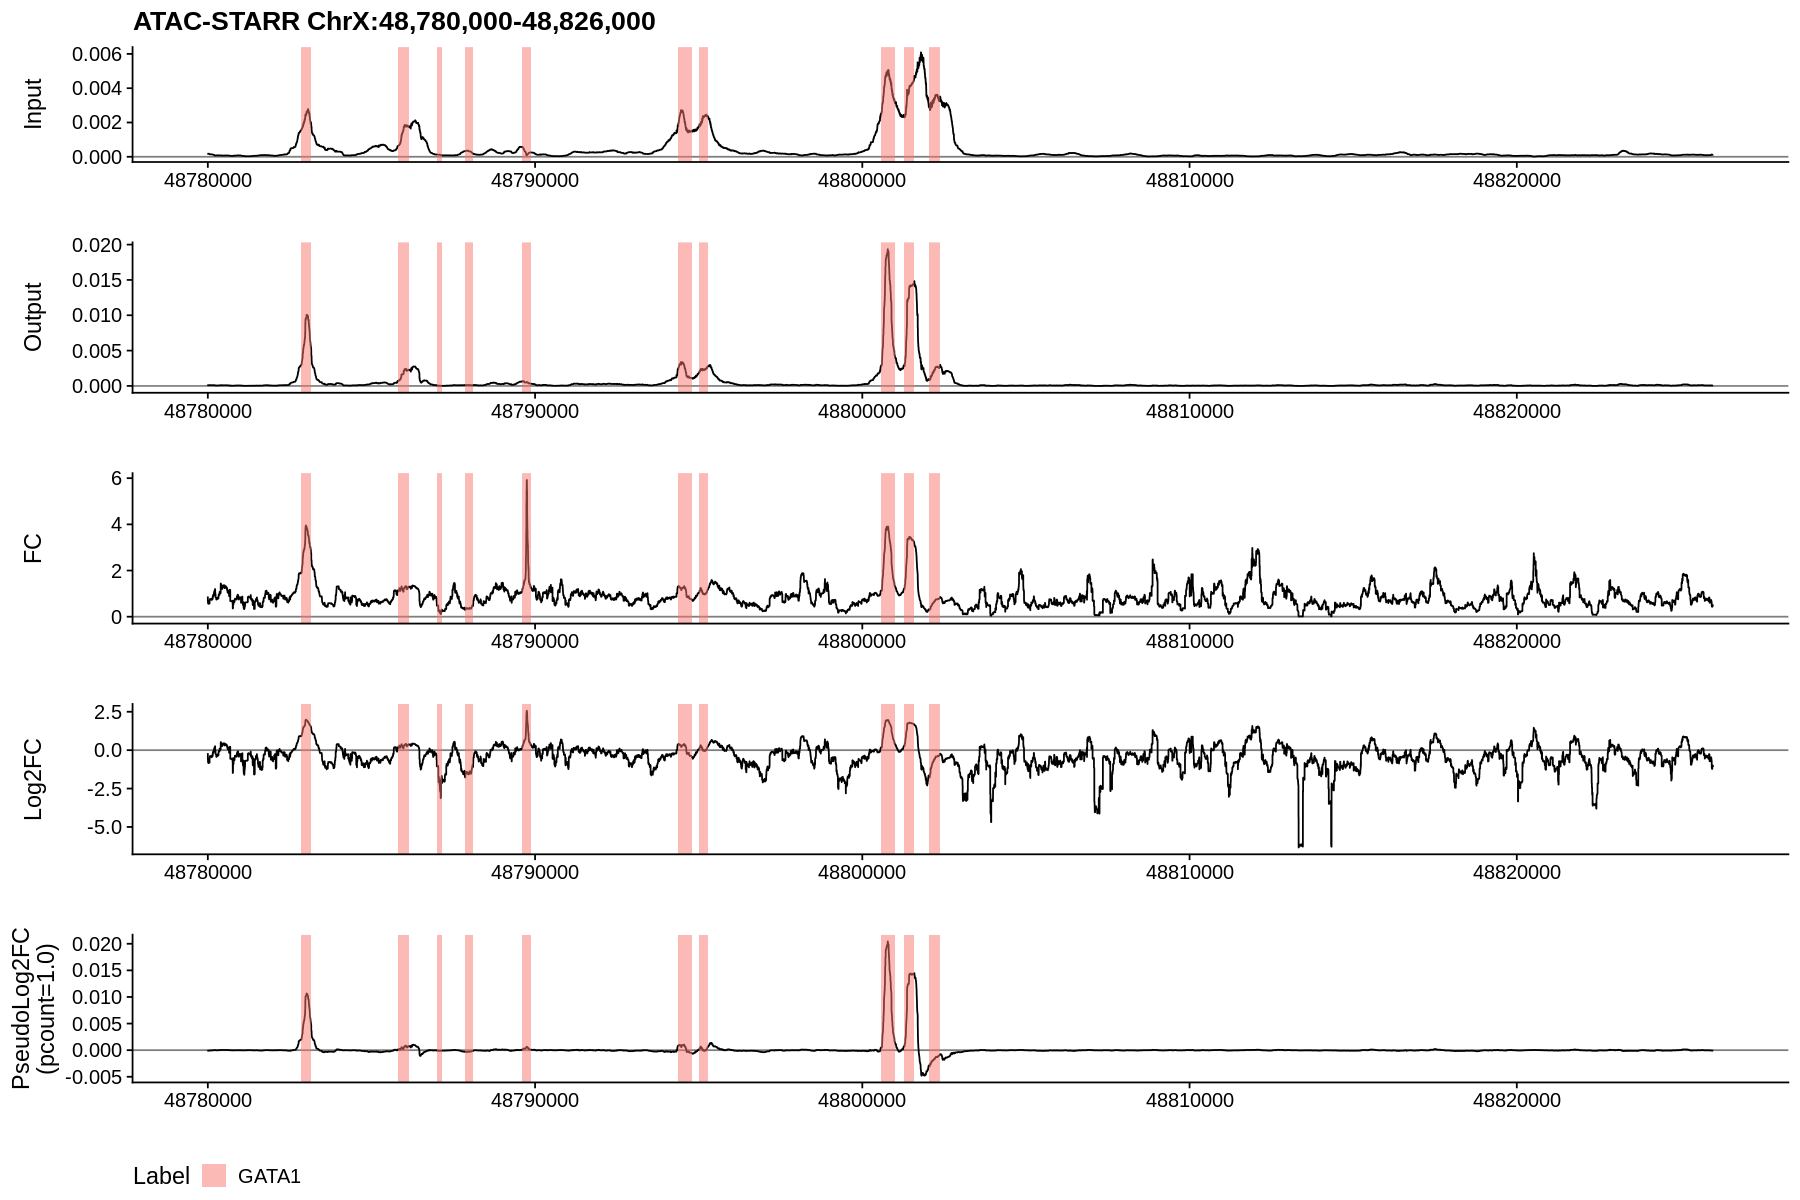

In [37]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1, rel_heights = c(1,1,1,1,1.2))

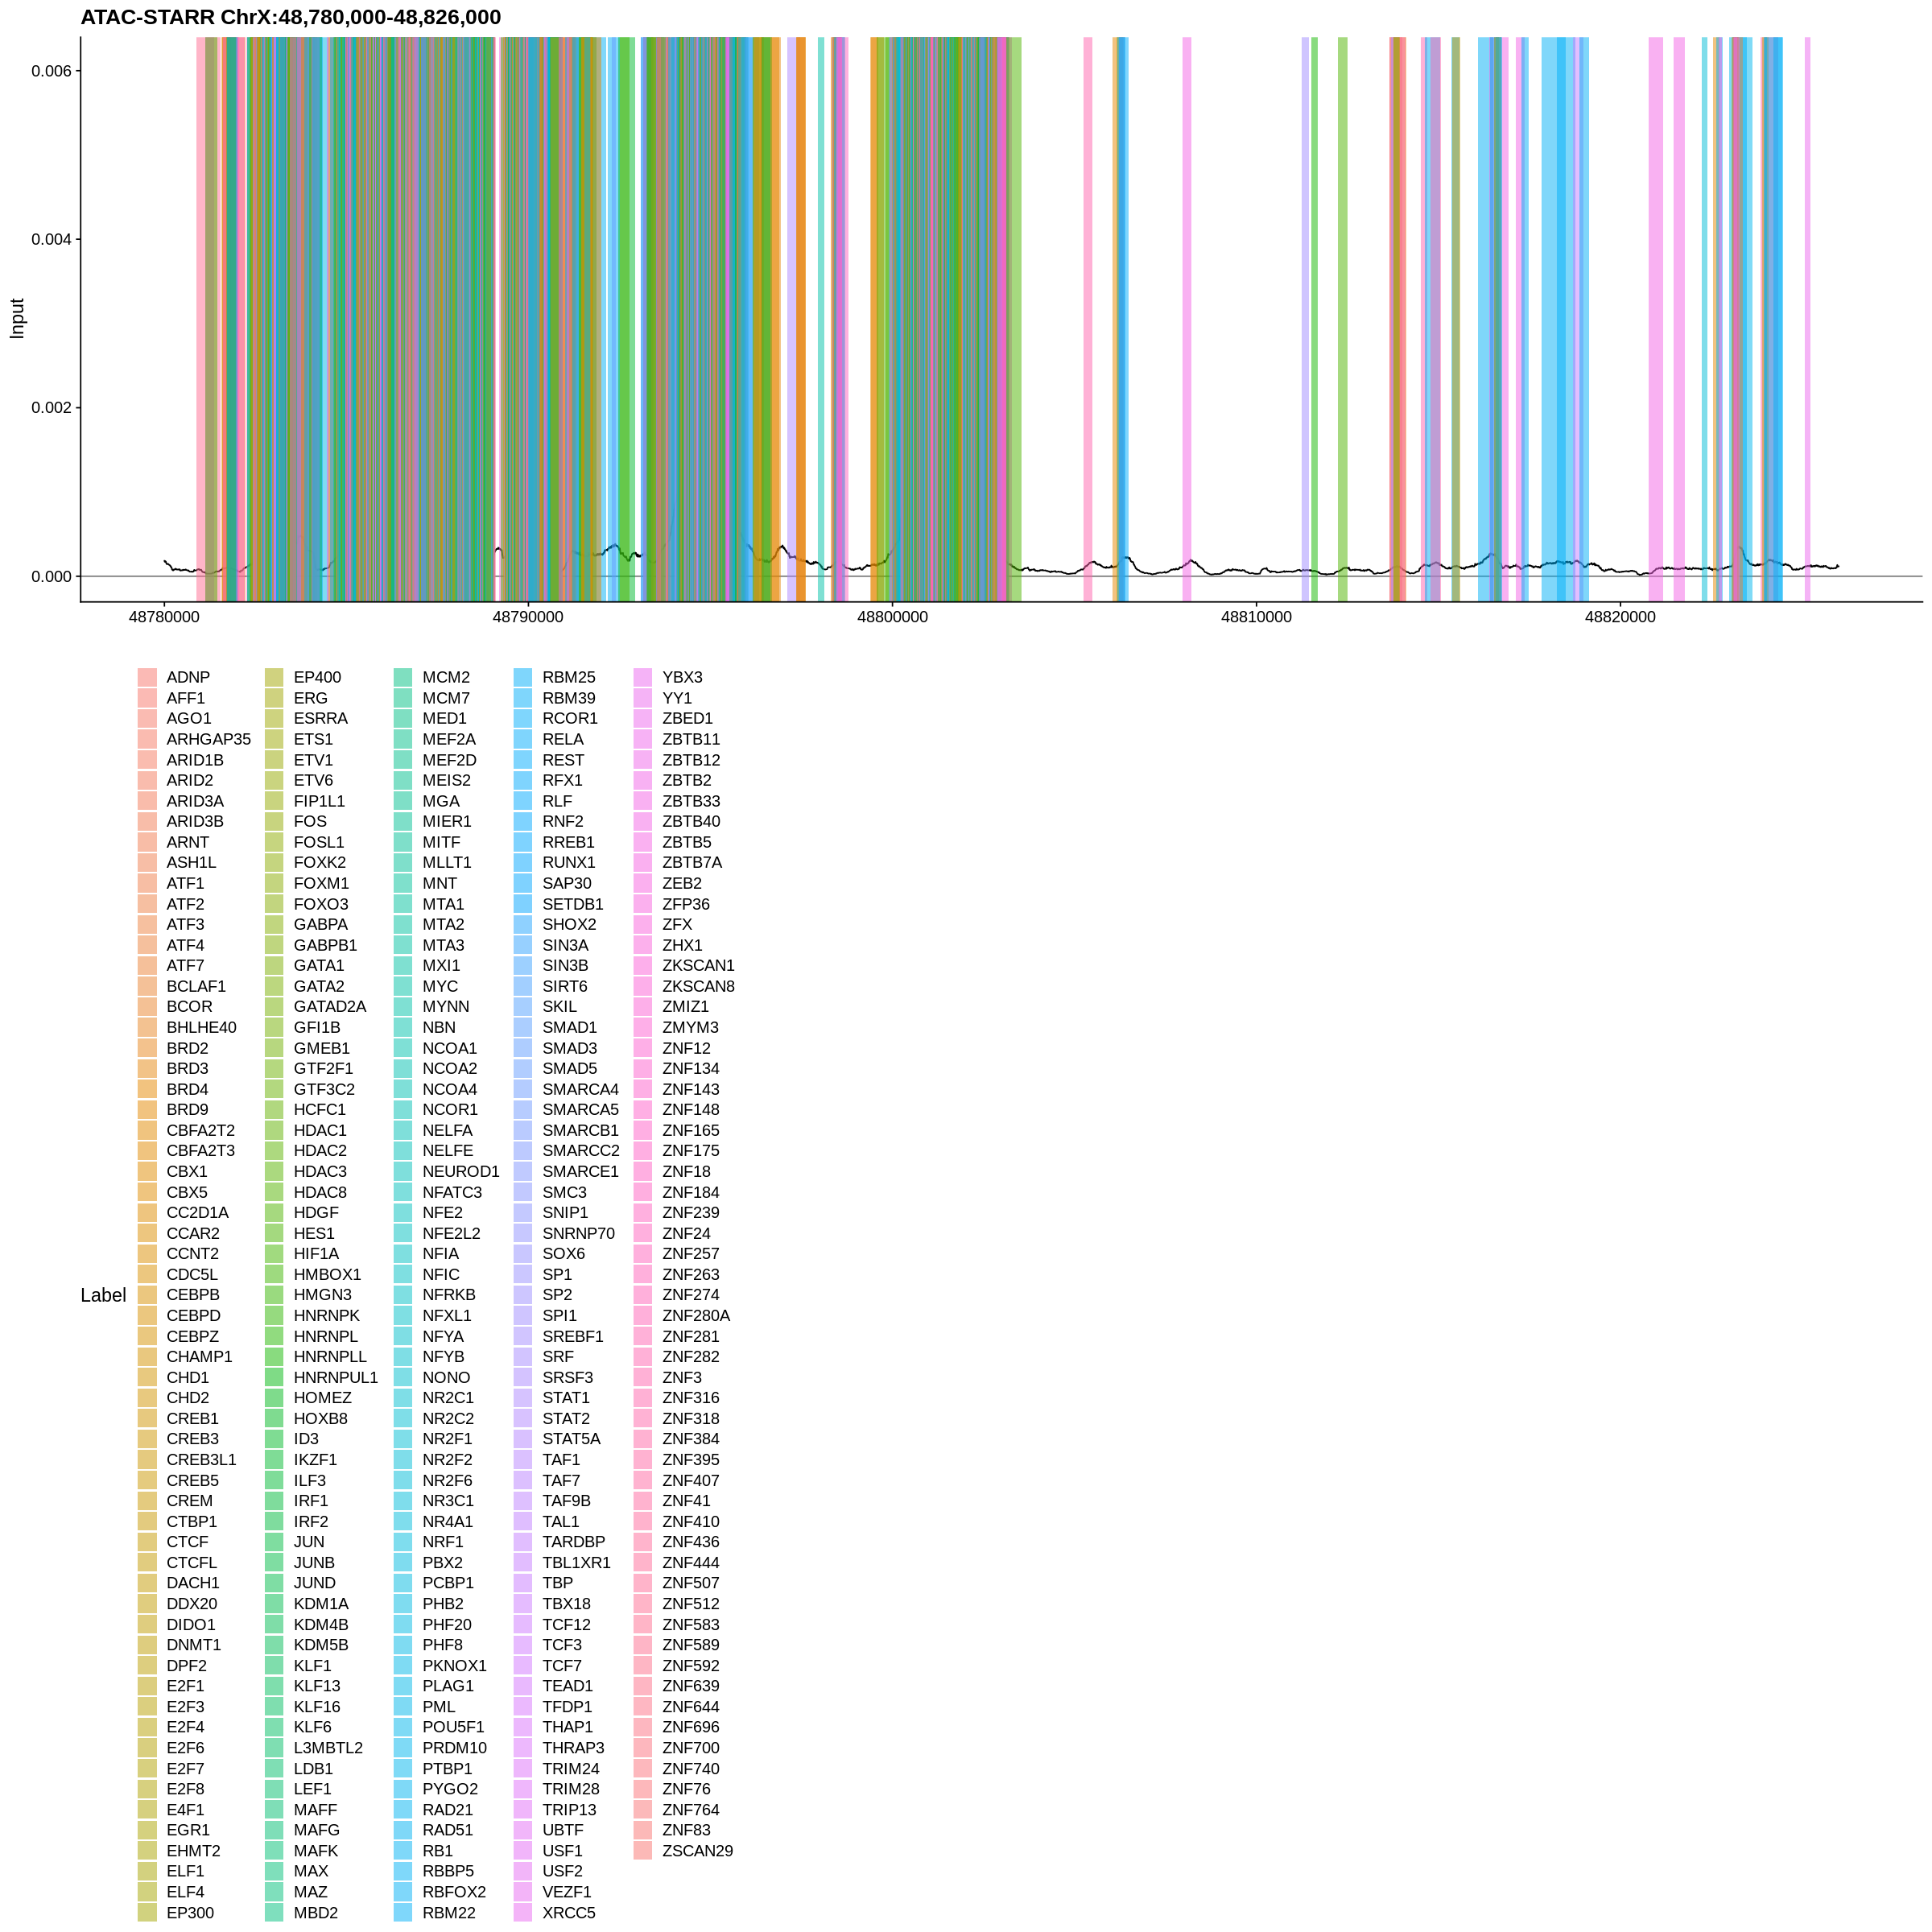

In [29]:
options(repr.plot.height=20, repr.plot.width=20)
lst[[1]] + theme(legend.position="bottom")